In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [10]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [12]:
#Resize images size
IMAGE_SIZE=[224,224]

train_path='C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train'
test_path='C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\test'

In [14]:
inception=InceptionV3(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 23s 0us/step


In [15]:
for layers in inception.layers:
    layers.trainable=False

In [16]:
folders=glob('C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train\*')

In [20]:
folders

['C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train\\Tomato___Bacterial_spot',
 'C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train\\Tomato___Early_blight',
 'C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train\\Tomato___healthy',
 'C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train\\Tomato___Late_blight',
 'C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train\\Tomato___Leaf_Mold',
 'C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train\\Tomato___Septoria_leaf_spot',
 'C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train\\Tomato___Target_Spot',
 'C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train\\Tom

In [21]:
x=Flatten()(inception.output)

In [23]:
prediction=Dense(len(folders),activation='softmax')(x)

model=Model(inputs=inception.input,outputs=prediction)

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory('C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [34]:

test_set = test_datagen.flow_from_directory('C:\\worked\\Data_science\\ML-Deployment\\archive\\New Plant Diseases Dataset\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [35]:
 r=model.fit_generator(training_set,
                       validation_data=test_set,
                       epochs=10,
                       steps_per_epoch=len(training_set),
                       validation_steps=len(test_set))

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
574/574 [==============================] - 910s 2s/step - loss: 4.0980 - accuracy: 0.5994 - val_loss: 2.2401 - val_accuracy: 0.7634
Epoch 2/10
574/574 [==============================] - 946s 2s/step - loss: 2.2833 - accuracy: 0.7779 - val_loss: 2.7903 - val_accuracy: 0.7638
Epoch 3/10
574/574 [==============================] - 949s 2s/step - loss: 2.0509 - accuracy: 0.8147 - val_loss: 2.2743 - val_accuracy: 0.8118
Epoch 4/10
574/574 [==============================] - 922s 2s/step - loss: 1.8339 - accuracy: 0.8462 - val_loss: 2.3735 - val_accuracy: 0.8209
Epoch 5/10
574/574 [==============================] - 925s 2s/step - loss: 1.8371 - accuracy: 0.8555 - val_loss: 1.9142 - val_accuracy: 0.8547
Epoch 6/10
574/574 [==============================] - 932s 2s/step - loss: 1.8132 - accuracy: 0.8608 - val_loss: 3.0133 - val_accuracy: 0.8118
Epoch 7/10
574/574 [==============================] - 965s 2s/step - loss: 1.8050 - accuracy: 0.8699 - val_loss: 2.3814 - val_accuracy: 0.8449

In [36]:
import matplotlib.pyplot as plt

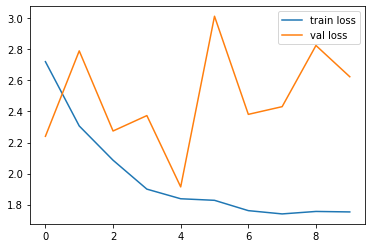

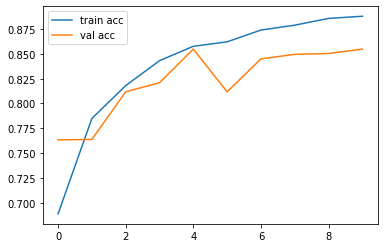

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
#save it as h5 file
from tensorflow.keras.models import load_model
model.save('model_inseption.h5')

In [54]:
y_pred=model.predict(test_set)

In [59]:
y_pred

array([1, 6, 7, ..., 0, 3, 4], dtype=int64)

In [65]:
y_pred.shape

(4585,)

In [75]:
#plt.imshow(test_set[0],shape=(224,224,3))

In [68]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [76]:
#model=load_model('model_resonate50.h5')

In [70]:
import tensorflow as tf
print(tf.__version__)

2.4.1
